<a href="https://colab.research.google.com/github/SupriyaSakshana/Tourism-Experience-Analytics-Classification-Prediction-and-Recommendation-System/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tourism Experience Analytics: Classification, Prediction, and Recommendation System**


  **Project Overview**



This project presents a comprehensive Tourism Analytics System designed to analyze tourist behavior and deliver intelligent insights through machine learning models and an interactive web application.




Here is the logical flow:

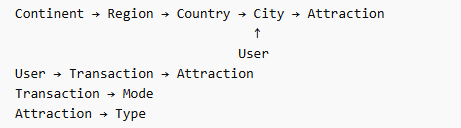

ER Diagram

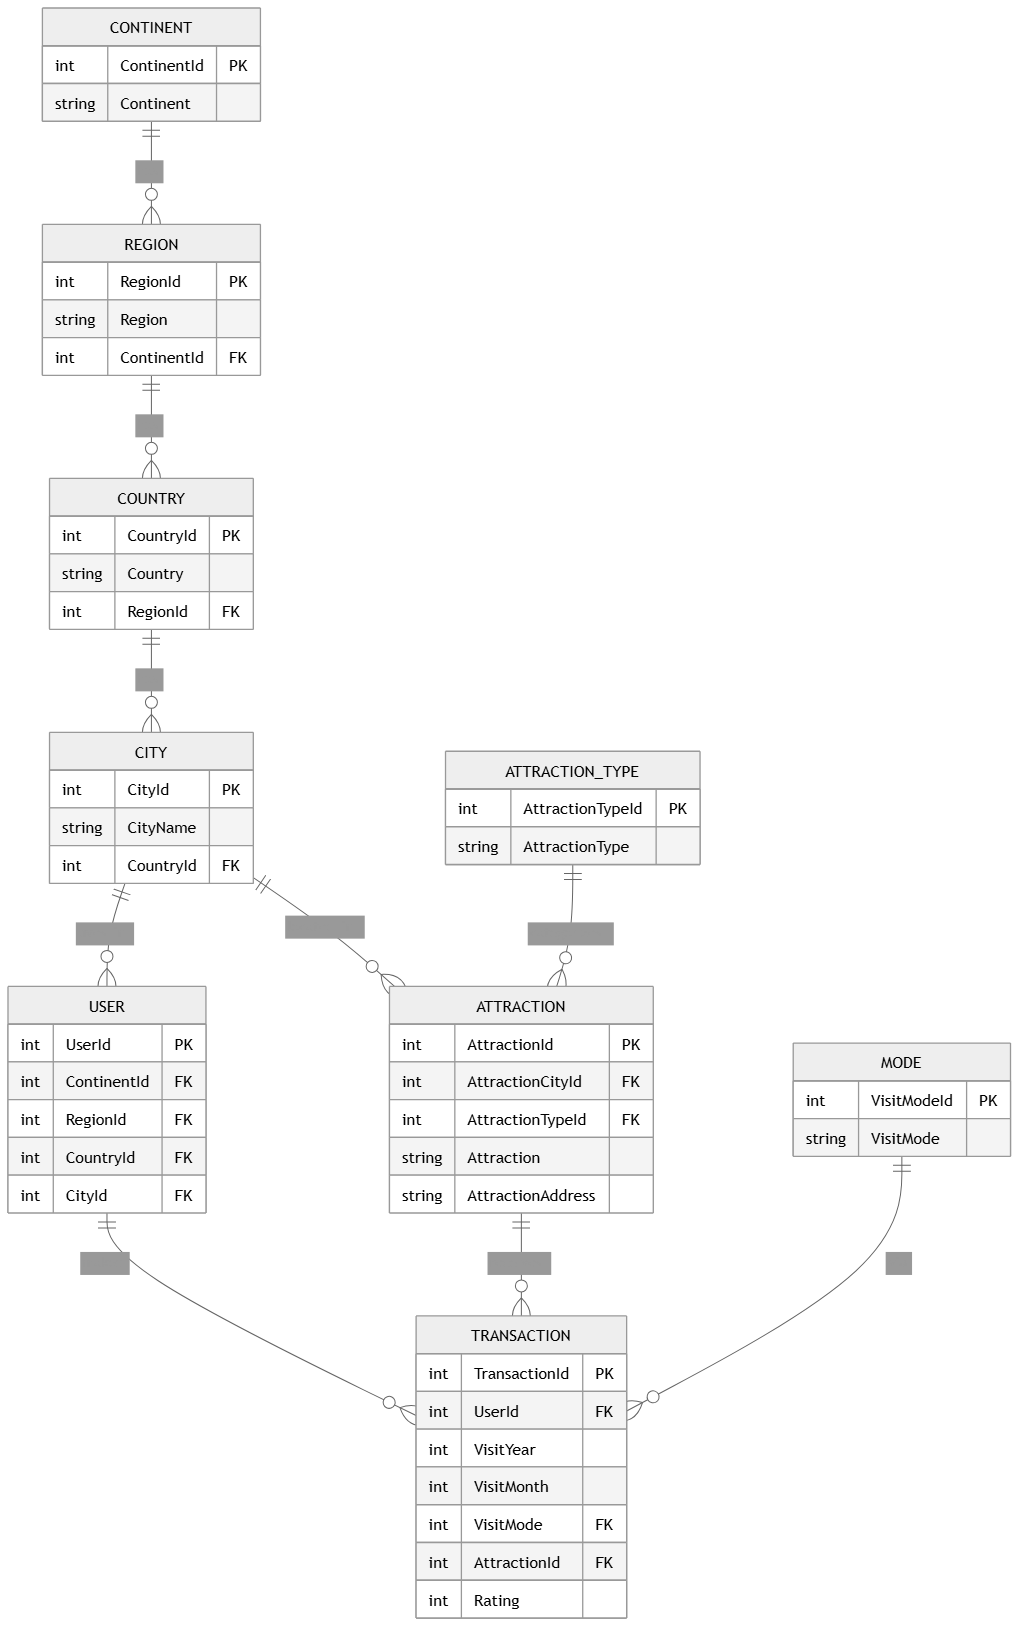

# **EDA** stands for **Exploratory Data Analysi**s.

It is the process of:

Understanding your dataset before applying any machine learning or modeling.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Final_Merged_data.xlsx to Final_Merged_data.xlsx


In [2]:
import pandas as pd

Tourism_data = pd.read_excel("Final_Merged_data.xlsx")
Tourism_data.head()

,UserId,TransactionId,VisitYear,VisitMonth,Rating,VisitDate,VisitMode_x,Attraction,AttractionAddress,AttractionType,CityName,Country,Region,Continent,Average rating per user,Total visits by VisitMode per user,Average rating per attraction,Total visits per user
0,70456,3,2022,10,1.0,2022-10-01,1,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches,Kerala,India,South East Asia,Asia,1.0,1,0.663674,1
1,7567,8,2022,10,1.0,2022-10-01,3,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches,Belleville,Canada,South America,America,1.0,1,0.663674,1
2,79069,9,2022,10,1.0,2022-10-01,2,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches,Squamish,Canada,South America,America,1.0,1,0.663674,1
3,31019,10,2022,10,0.5,2022-10-01,2,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches,Innisfil,Canada,South America,America,0.5,2,0.663674,2
4,43611,15,2022,10,0.5,2022-10-01,1,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches,Crown Point,United States,South America,America,0.5,3,0.663674,3


 **Visualize user distribution across continents, countries, and regions.**

Count of users by continent

In [3]:
continent_counts = Tourism_data['Continent'].value_counts().reset_index()
continent_counts.columns = ['Continent', 'Total_Users']
continent_counts

,Continent,Total_Users
0,America,31700
1,Australia & Oceania,15833
2,Asia,12516
3,Africa,1726
4,Europe,448


/tmp/ipython-input-842791615.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=continent_counts.Continent, y=continent_counts.Total_Users, palette="Blues_r")


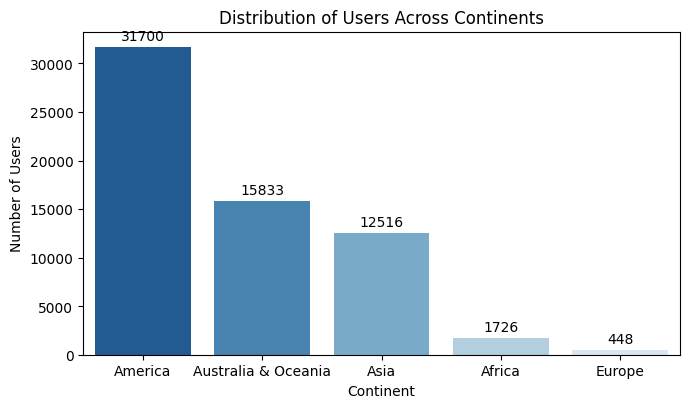

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of users by continent
plt.figure(figsize=(7, 4))
ax = sns.barplot(x=continent_counts.Continent, y=continent_counts.Total_Users, palette="Blues_r")

for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=3)

plt.tight_layout()
plt.title("Distribution of Users Across Continents")
plt.xlabel("Continent")
plt.ylabel("Number of Users")
plt.show()

Count of users by region

In [5]:
region_counts = Tourism_data['Region'].value_counts().reset_index()
region_counts.columns = ['Region', 'Total_Users']
region_counts

,Region,Total_Users
0,South America,28925
1,Oceania,9438
2,Australia,6395
3,Middle East,5856
4,South East Asia,2475
5,Northern America,2195
6,South Asia,2071
7,Central Asia,2031
8,West Africa,938
9,Central America,541


/tmp/ipython-input-3727840176.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=region_counts.Region, y=region_counts.Total_Users, palette="Blues_r")


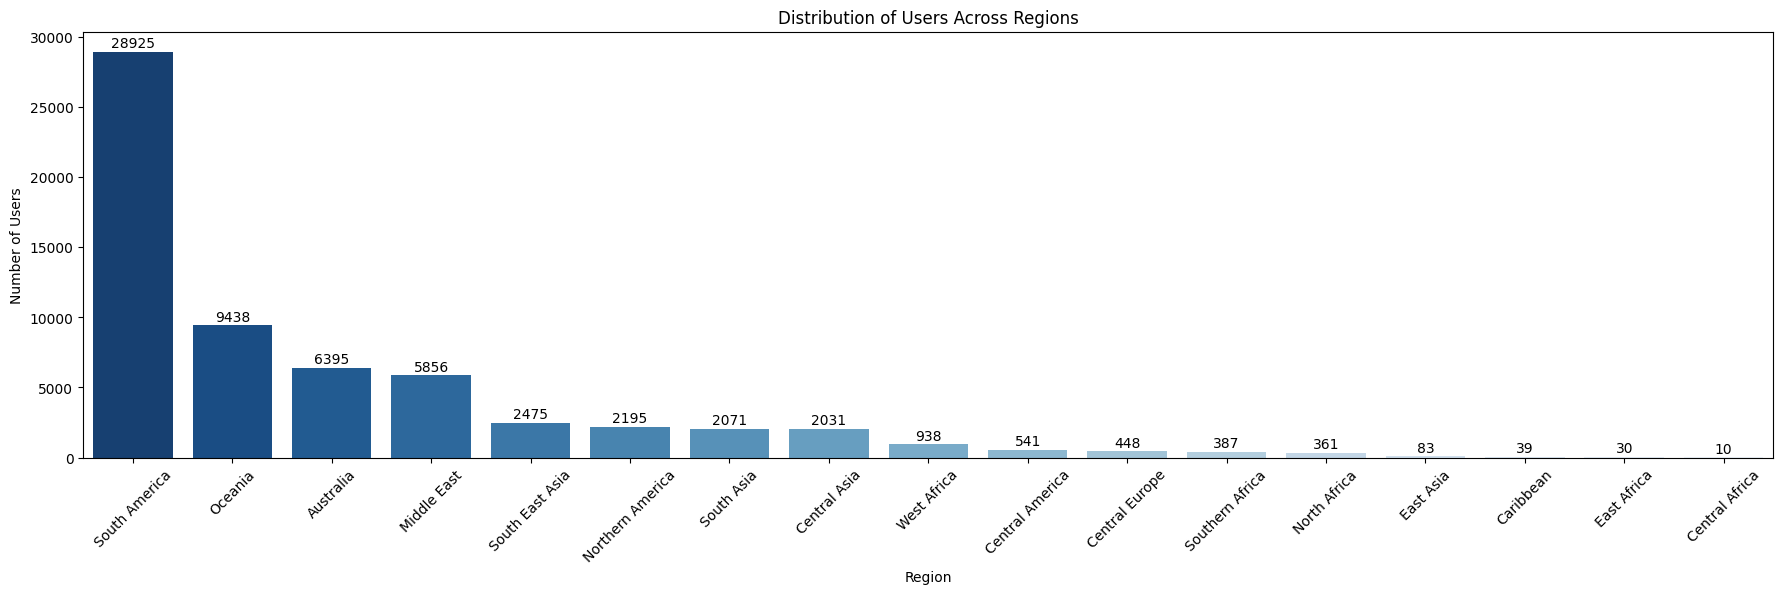

In [6]:
# Count of users by continent
plt.figure(figsize=(18, 5))
ax = sns.barplot(x=region_counts.Region, y=region_counts.Total_Users, palette="Blues_r")

for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=1)

plt.tight_layout()
plt.xticks(rotation=45)
plt.title("Distribution of Users Across Regions")
plt.xlabel("Region")
plt.ylabel("Number of Users")
plt.show()

Count of users by Country

In [7]:
country_counts = Tourism_data['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Total_Users']
country_counts.sort_values(by='Total_Users', ascending=False)

,Country,Total_Users
0,United States,22655
1,Australia,9438
2,Canada,5639
3,China,3573
4,Indonesia,3558
...,...,...
110,Libya,1
111,Côte d'Ivoire,1
112,Uzbekistan,1
113,Malawi,1


In [8]:
top_n = 10
top_countries = country_counts.nlargest(top_n, 'Total_Users')
top_countries

,Country,Total_Users
0,United States,22655
1,Australia,9438
2,Canada,5639
3,China,3573
4,Indonesia,3558
5,Japan,1948
6,India,1905
7,Nicaragua,1847
8,Philippines,1196
9,Argentina,976


/tmp/ipython-input-639244181.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_countries.Country, y=top_countries.Total_Users, palette="Blues_r")


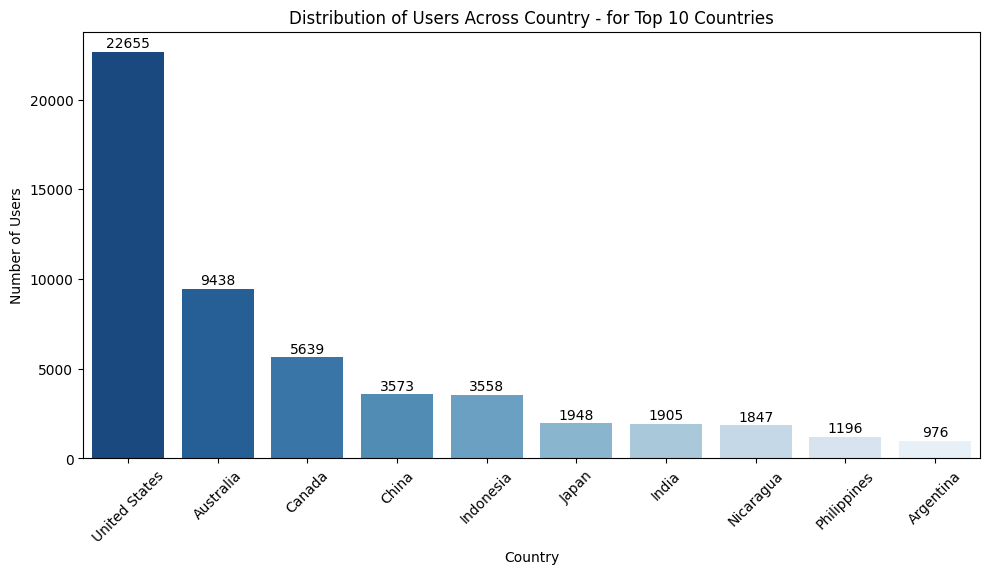

In [9]:
# Count of users by Country
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=top_countries.Country, y=top_countries.Total_Users, palette="Blues_r")

for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=1)

plt.tight_layout()
plt.xticks(rotation=45)
plt.title("Distribution of Users Across Country - for Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Number of Users")
plt.show()

Count of users by City

In [10]:
city_counts = Tourism_data['CityName'].value_counts().reset_index()
city_counts.columns = ['City', 'Total_Users']
city_counts

,City,Total_Users
0,Hong Kong,3082
1,Del Mar,2554
2,Megamendung,2040
3,Rivas,1843
4,Edmonton,1828
...,...,...
5384,Port Colborne,1
5385,Australia,1
5386,Windermere,1
5387,Katanning,1


In [11]:
top_n = 10
top_city = city_counts.nlargest(top_n, 'Total_Users')
top_city

,City,Total_Users
0,Hong Kong,3082
1,Del Mar,2554
2,Megamendung,2040
3,Rivas,1843
4,Edmonton,1828
5,Trophy Club,1760
6,Boca Raton,1741
7,Maniwa,1229
8,Sulaymaniyah,956
9,Province of Cordoba,905


/tmp/ipython-input-1202361967.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_city.City, y=top_city.Total_Users, palette="Blues_r")


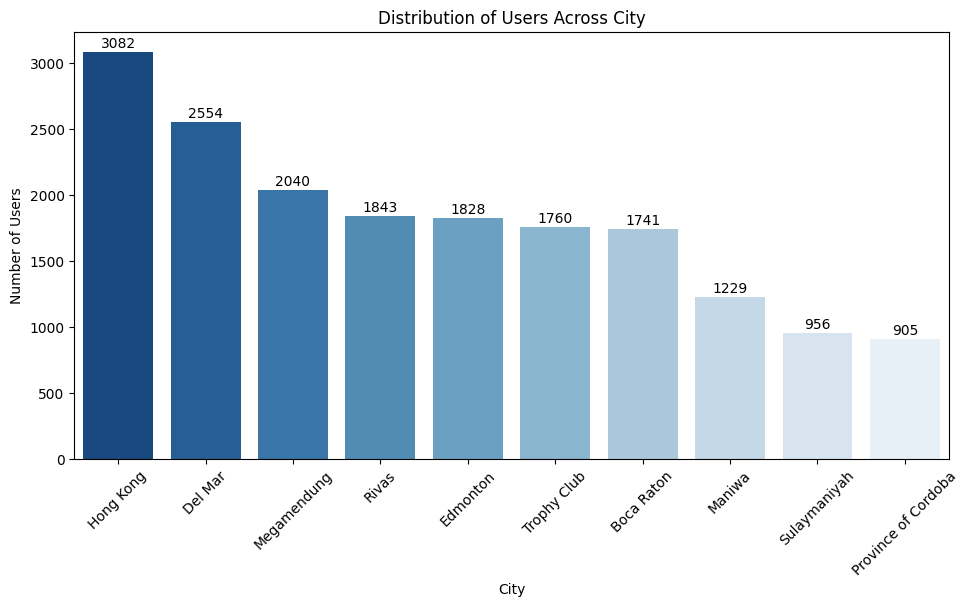

In [12]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=top_city.City, y=top_city.Total_Users, palette="Blues_r")

for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=1)

plt.tight_layout()
plt.xticks(rotation=45)
plt.title("Distribution of Users Across City")
plt.xlabel("City")
plt.ylabel("Number of Users")
plt.show()

Explore attraction types and their popularity based on user ratings.

Popularity of Attraction Types by Visits:

In [13]:
attraction_type_counts = Tourism_data['AttractionType'].value_counts().reset_index()
attraction_type_counts.columns = ['AttractionType', 'Total_Visits']
attraction_type_counts

,AttractionType,Total_Visits
0,Caverns & Caves,34371
1,Beaches,15246
2,Ballets,9051
3,Ancient Ruins,3555


/tmp/ipython-input-1788987480.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=attraction_type_counts.AttractionType, y=attraction_type_counts.Total_Visits, palette="Blues_r")


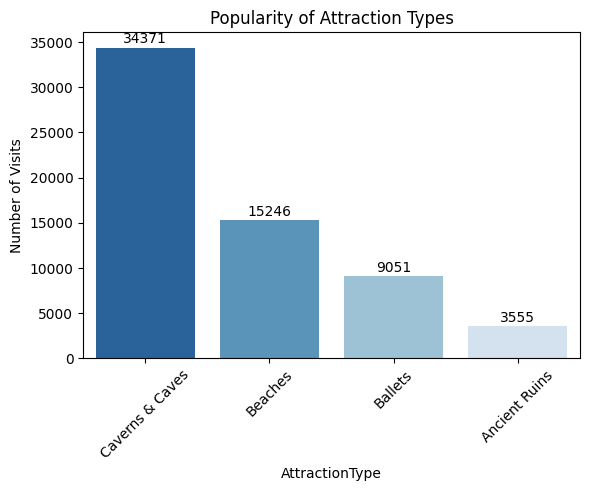

In [14]:
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=attraction_type_counts.AttractionType, y=attraction_type_counts.Total_Visits, palette="Blues_r")

for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=1)

plt.tight_layout()
plt.xticks(rotation=45)
plt.title("Popularity of Attraction Types")
plt.xlabel("AttractionType")
plt.ylabel("Number of Visits")
plt.show()

Average ratings of AttractionType

In [15]:
attraction_type_stats = Tourism_data.groupby('AttractionType')['Rating'].mean().reset_index()
attraction_type_stats.columns = ['AttractionType','Average_rating_per_AttractionType']
attraction_type_stats = attraction_type_stats.sort_values(by='Average_rating_per_AttractionType', ascending=False )
attraction_type_stats

,AttractionType,Average_rating_per_AttractionType
2,Beaches,0.816804
3,Caverns & Caves,0.805563
0,Ancient Ruins,0.746554
1,Ballets,0.697078


/tmp/ipython-input-4229331815.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=attraction_type_stats.AttractionType, y=attraction_type_stats.Average_rating_per_AttractionType, palette="Blues_r")


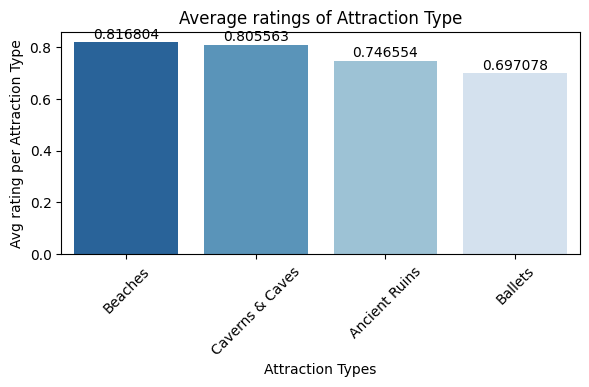

In [16]:
plt.figure(figsize=(6, 3))
ax = sns.barplot(x=attraction_type_stats.AttractionType, y=attraction_type_stats.Average_rating_per_AttractionType, palette="Blues_r")

for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=1)

plt.tight_layout()
plt.xticks(rotation=45)
plt.title("Average ratings of Attraction Type")
plt.xlabel("Attraction Types")
plt.ylabel("Avg rating per Attraction Type")
plt.show()

Investigate correlation between VisitMode and user demographics to identify patterns.

Visit modes by continent:

In [17]:
visit_mode_continent = Tourism_data.groupby(['Continent', 'VisitMode_x'])['UserId'].count().reset_index()
visit_mode_continent.columns = ['Continent', 'VisitMode', 'No_Of_Users']
visit_mode_continent

,Continent,VisitMode,No_Of_Users
0,Africa,0,6
1,Africa,1,779
2,Africa,2,430
3,Africa,3,343
4,Africa,4,168
5,America,0,548
6,America,1,12249
7,America,2,8797
8,America,3,6868
9,America,4,3238


In [18]:
import plotly.express as px

fig = px.bar(
    visit_mode_continent,
    x="Continent",
    y="No_Of_Users",
    color="VisitMode",
    barmode="group",
    text="No_Of_Users",
    title="Number of Users by Visit Mode Across Continents",
    color_discrete_sequence=px.colors.sequential.Purples  # Purple shades
)

fig.update_layout(
    width=800,      # smaller width
    height=650,     # smaller height
    xaxis_title="Continent",
    yaxis_title="Number of Users",
    legend_title="Visit Mode",
    bargap=0.2
)

fig.update_traces(textposition='outside')

fig.show()

Analyze distribution of ratings across different attractions and regions.

In [19]:
Distribution_Rating = Tourism_data[['Region', 'Attraction','Rating','Average rating per user']]
Distribution_Rating.sort_values(by='Rating', ascending=False)

,Region,Attraction,Rating,Average rating per user
62222,Oceania,Cultural Heritage Center - Oujda,1.0,0.875
0,South East Asia,Museum Malang Tempo Doeloe,1.0,1.000
1,South America,Museum Malang Tempo Doeloe,1.0,1.000
2,South America,Museum Malang Tempo Doeloe,1.0,1.000
62219,Oceania,Cultural Heritage Center - Oujda,1.0,0.875
...,...,...,...,...
49284,Oceania,Tegalalang Rice Terrace,0.0,0.000
49283,Australia,Tegalalang Rice Terrace,0.0,0.750
62188,South America,Cultural Heritage Center - Oujda,0.0,0.000
62184,South America,Cultural Heritage Center - Oujda,0.0,0.000


In [20]:
# First, group and aggregate
rating_counts = Distribution_Rating.groupby(['Region', 'Attraction'])['Rating'].count().reset_index()
rating_counts.columns = ['Region', 'Attraction', 'Total_Reviews']

# Now merge back into the original Distribution_Rating DataFrame
Distribution_Ratings = pd.merge(Distribution_Rating, rating_counts, on=['Region', 'Attraction'], how='left')
Distribution_Ratings

,Region,Attraction,Rating,Average rating per user,Total_Reviews
0,South East Asia,Museum Malang Tempo Doeloe,1.00,1.000,626
1,South America,Museum Malang Tempo Doeloe,1.00,1.000,6869
2,South America,Museum Malang Tempo Doeloe,1.00,1.000,6869
3,South America,Museum Malang Tempo Doeloe,0.50,0.500,6869
4,South America,Museum Malang Tempo Doeloe,0.50,0.500,6869
...,...,...,...,...,...
62218,Oceania,Cultural Heritage Center - Oujda,0.75,0.500,181
62219,Oceania,Cultural Heritage Center - Oujda,1.00,0.875,181
62220,Oceania,Cultural Heritage Center - Oujda,0.75,0.875,181
62221,Oceania,Cultural Heritage Center - Oujda,0.75,0.875,181


In [21]:
Top10_Distribution_Ratings =  Distribution_Ratings.nlargest(100, 'Rating')
Top10_Distribution_Ratings

,Region,Attraction,Rating,Average rating per user,Total_Reviews
0,South East Asia,Museum Malang Tempo Doeloe,1.0,1.000000,626
1,South America,Museum Malang Tempo Doeloe,1.0,1.000000,6869
2,South America,Museum Malang Tempo Doeloe,1.0,1.000000,6869
5,South America,Museum Malang Tempo Doeloe,1.0,1.000000,6869
7,Oceania,Museum Malang Tempo Doeloe,1.0,1.000000,2794
...,...,...,...,...,...
156,Oceania,Museum Malang Tempo Doeloe,1.0,0.937500,2794
158,Northern America,Museum Malang Tempo Doeloe,1.0,1.000000,834
160,Northern America,Museum Malang Tempo Doeloe,1.0,0.916667,834
161,Middle East,Museum Malang Tempo Doeloe,1.0,1.000000,990


In [22]:
import plotly.express as px

fig = px.scatter(
    Top10_Distribution_Ratings,
    x='Region',
    y='Average rating per user',
    size='Total_Reviews',
    color='Region',
    hover_name='Attraction',
    title="Distribution of Top 100 Ratings Across Attractions and Regions"
)

fig.update_layout(
    xaxis_title="Region",
    yaxis_title="Average Rating",
    legend_title="Region",
    template="plotly_white"
)

fig.show()